# Assignment - 3
**Implement TD(n) algorithm for different**
**environment (Frozen lake and Cliff Walker) and explore custom reward setting.**

# Modules

In [20]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
import time
from gymnasium import Env, spaces

<h1> Frozen Lake </h1>

/home/vignesh-aravindh-b/inferno_overdrive/lib/python3.12/site-packages/gymnasium/envs/toy_text/frozen_lake.py:329: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake-v1", render_mode="rgb_array")
  gym.logger.warn(


Frozen Lake Environment:


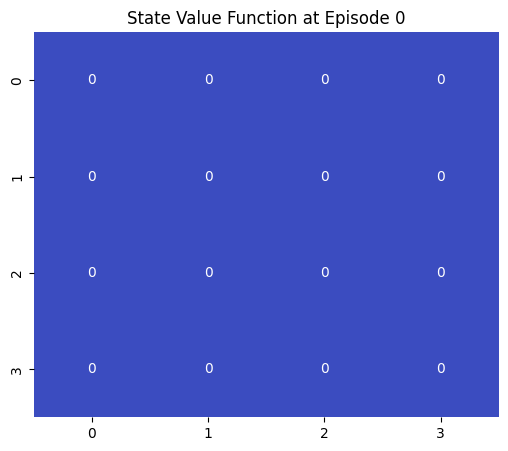

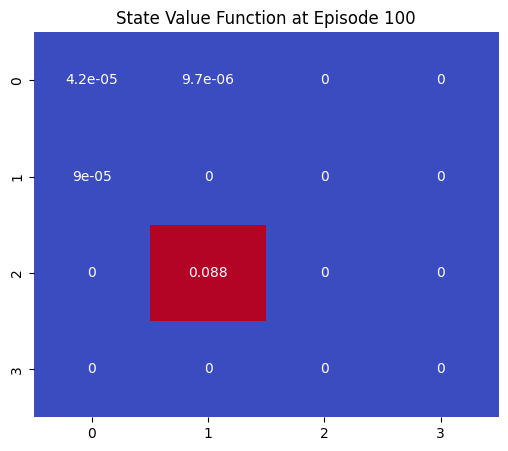

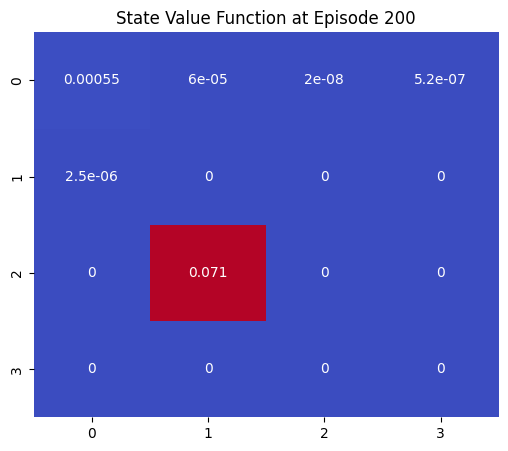

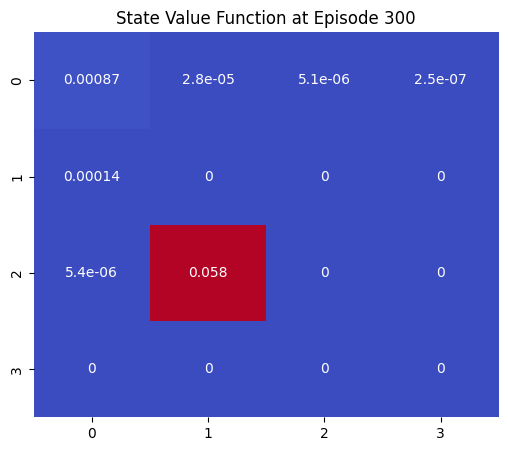

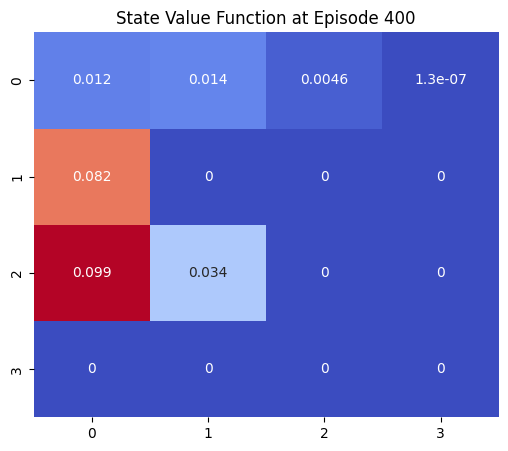

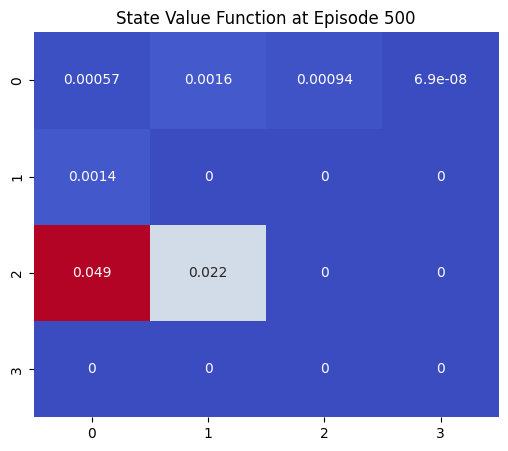

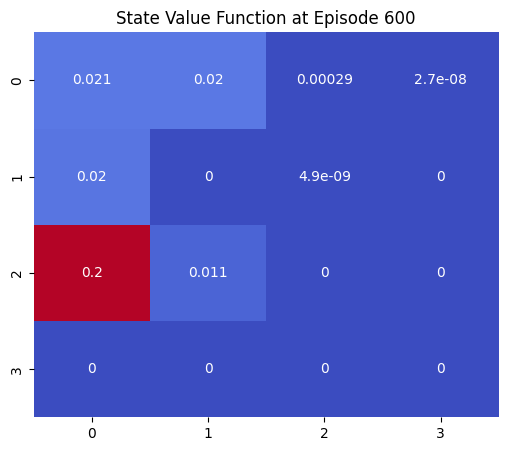

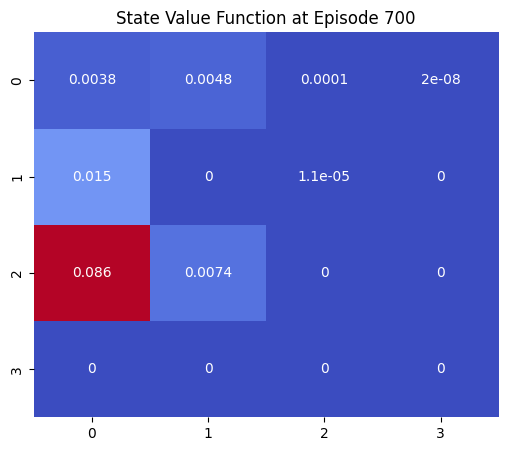

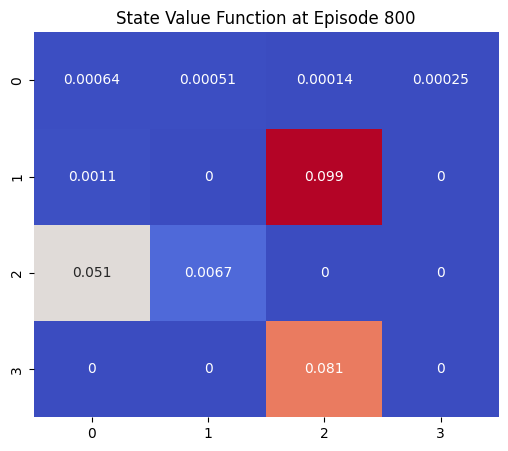

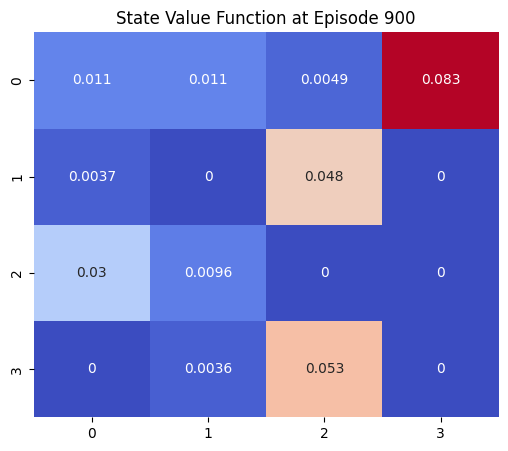

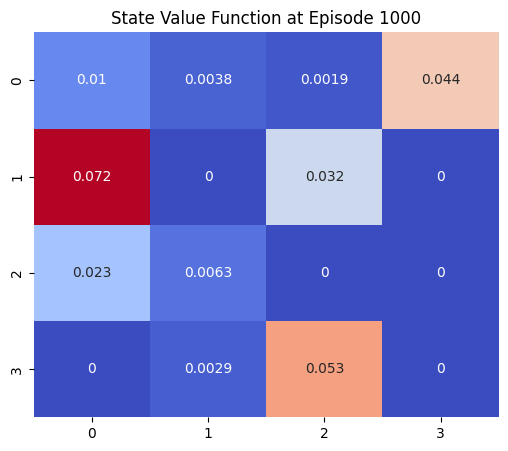

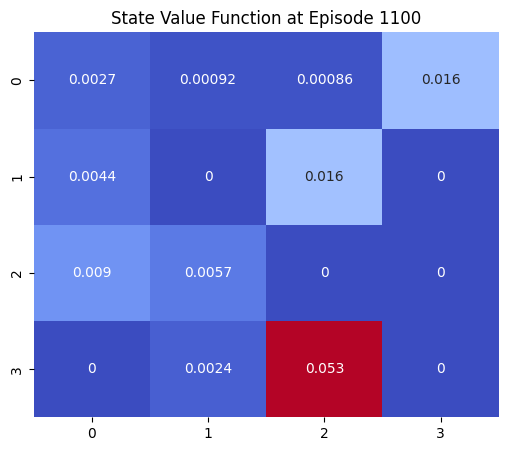

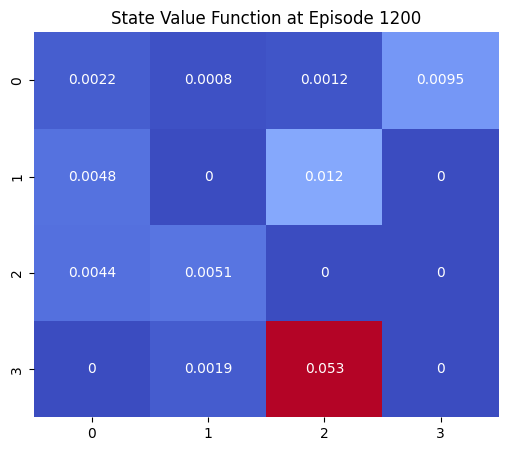

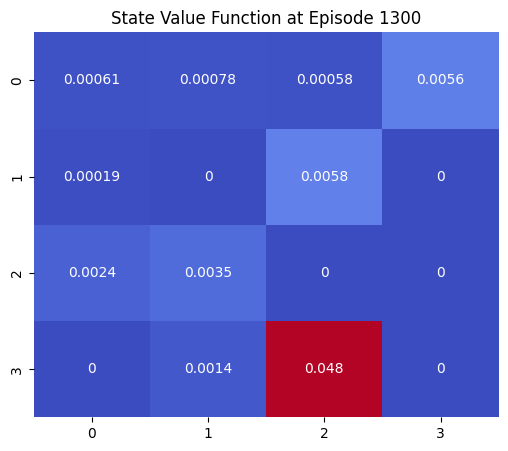

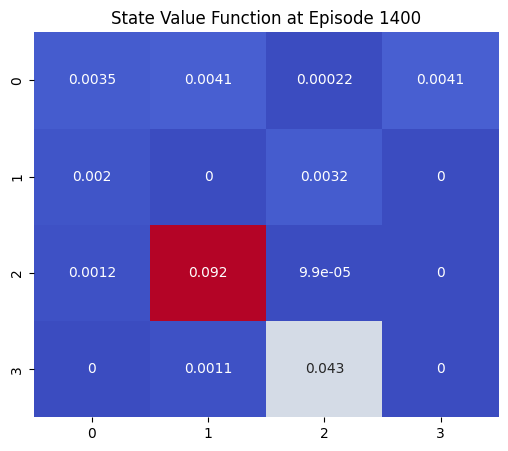

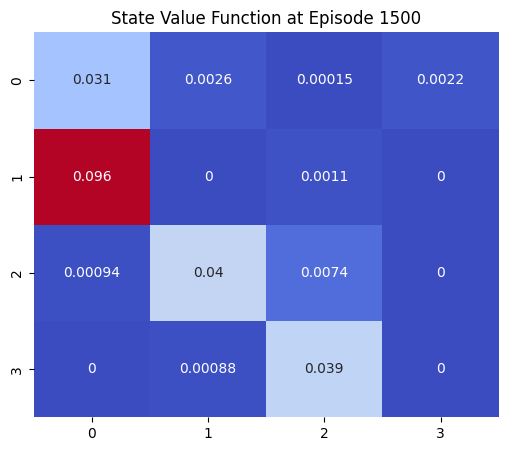

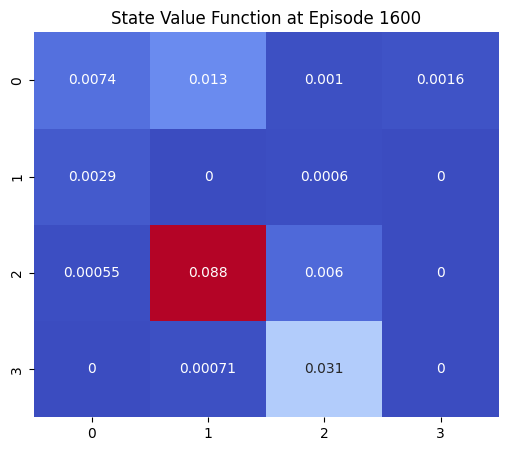

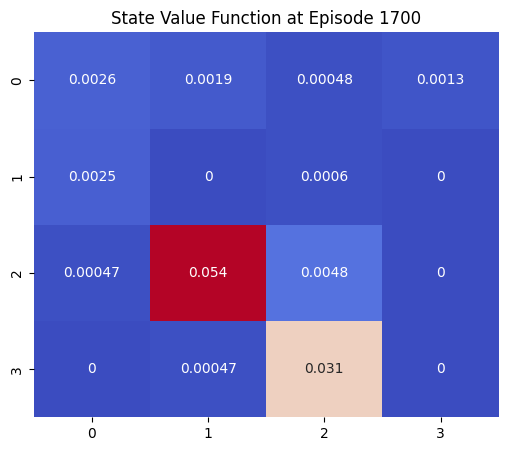

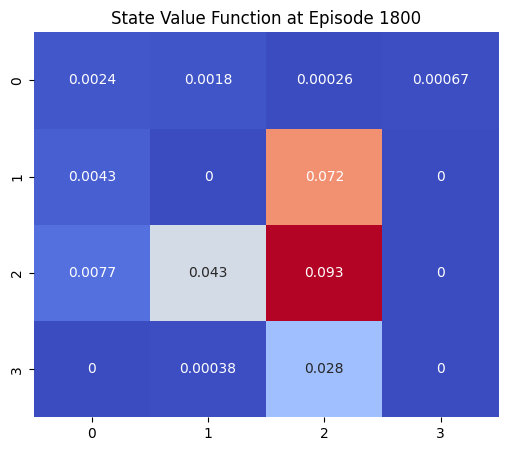

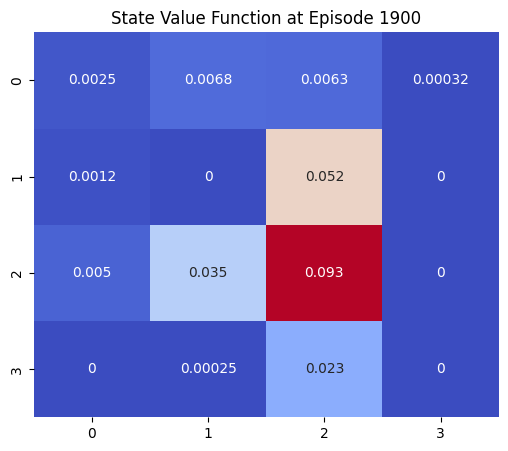

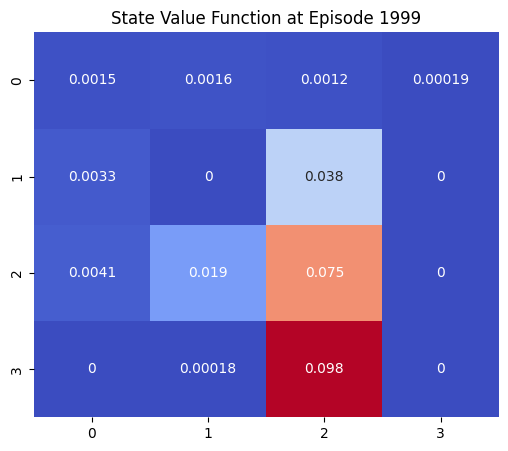

Final Learned Value Function:
[0.00149224 0.00161761 0.00117971 0.00018911 0.00327477 0.
 0.03809474 0.         0.00411237 0.01883495 0.07535137 0.
 0.         0.00018118 0.09767718 0.        ]


In [ ]:
class TD0Agent:
    def __init__(self, env, alpha=0.1, gamma=0.99):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = int(np.sqrt(env.observation_space.n))  # Assuming square grid

    def policy(self, state):
        """Random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

        # recursive function call to sum over the futuristic rewards
    def exponent_sum(self, state, n):
        if n == 0:
            return self.V[state]  # Bootstrapping from the last state's value

        action = self.policy(state)
        next_state, reward, done, _, _ = self.env.step(action)

        if done:
            return reward  # No future rewards if episode ends

        return reward + self.gamma * self.exponent_sum(next_state, n - 1)


    def train(self, n, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            # print(f"Episode : {episode + 1}")
            state = self.env.reset()[0]  # Reset environment
            done = False
            iter = n
            while not done:
                action = self.policy(state)
                next_state, reward, done, _, _ = self.env.step(action)
                # n = n-1
                # TD(0) update rule
                # self.gamma * self.V[next_state] - exponent sum
                self.V[state] += self.alpha * (self.exponent_sum(state, n) - self.V[state])

                state = next_state  # Move to the next state

            # Visualize every few episodes
            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(6, 5))
        sns.heatmap(self.V.reshape(self.grid_size, self.grid_size), annot=True, cmap="coolwarm", cbar=False)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)  # Pause to see updates

    def render_frozen_lake(self):
        """Renders the Frozen Lake Environment."""
        self.env.reset()
        self.env.render()

    def get_value_function(self):
        return self.V

# Example Usage
env = gym.make("FrozenLake-v1")
# env = gym.make("FrozenLake-v1", render_mode = 'human')  # A simple gridworld environment
agent = TD0Agent(env)

# Render the initial FrozenLake grid
print("Frozen Lake Environment:")
agent.render_frozen_lake()

n = int(input("Enter the number of futuristic states to sample from : "))

# Train the agent and visualize updates
agent.train(n, episodes=2000, visualize_interval=100)

# Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())


<h1>Cliff Walking</h1>

/home/vignesh-aravindh-b/inferno_overdrive/lib/python3.12/site-packages/gymnasium/envs/toy_text/cliffwalking.py:218: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CliffWalking-v0", render_mode="rgb_array")
  gym.logger.warn(


Cliff Walking Environment:


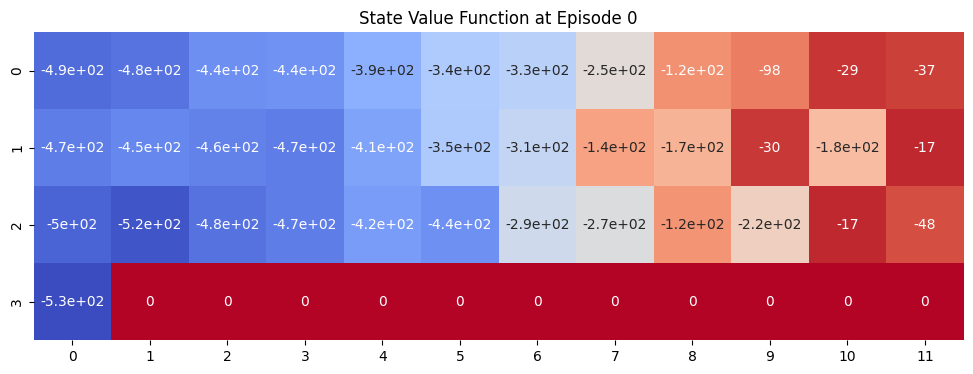

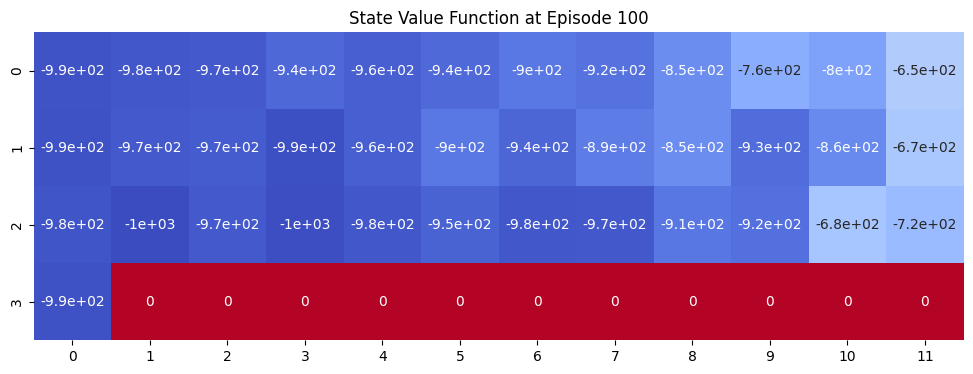

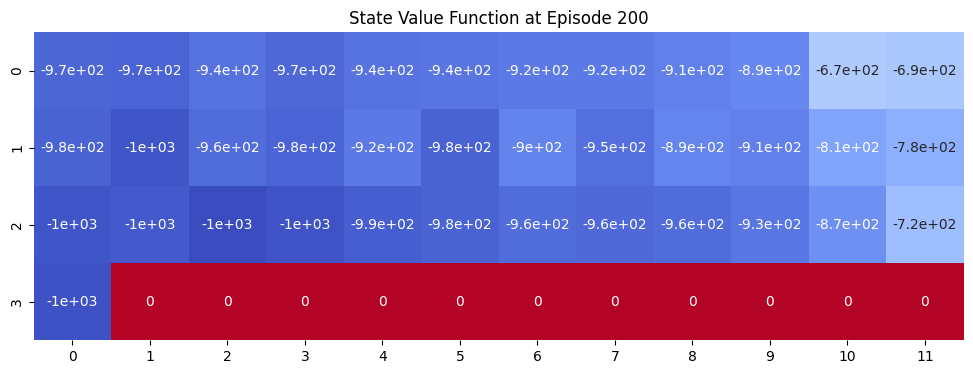

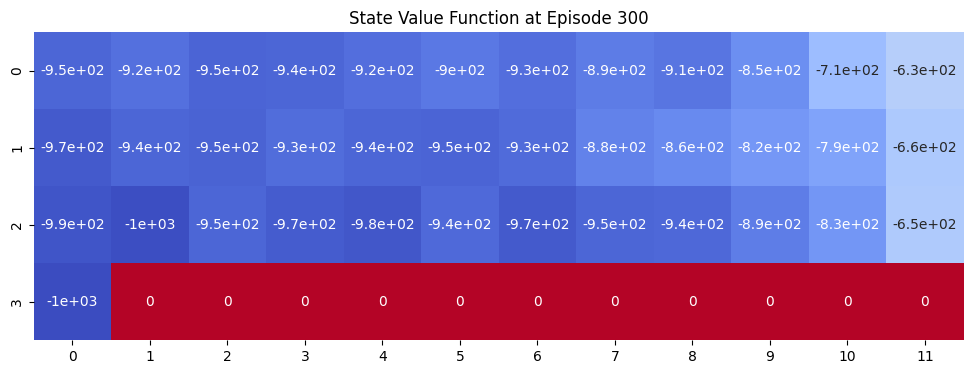

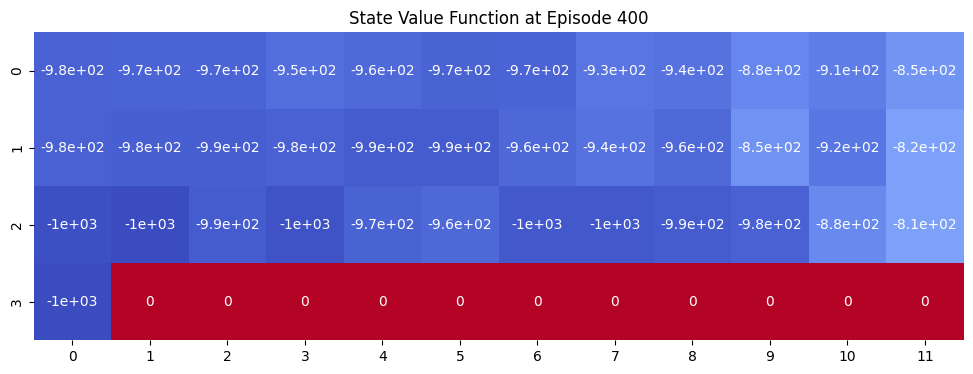

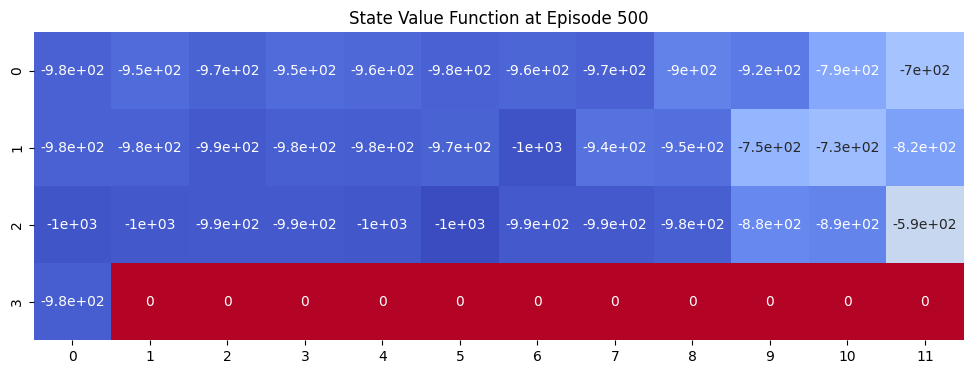

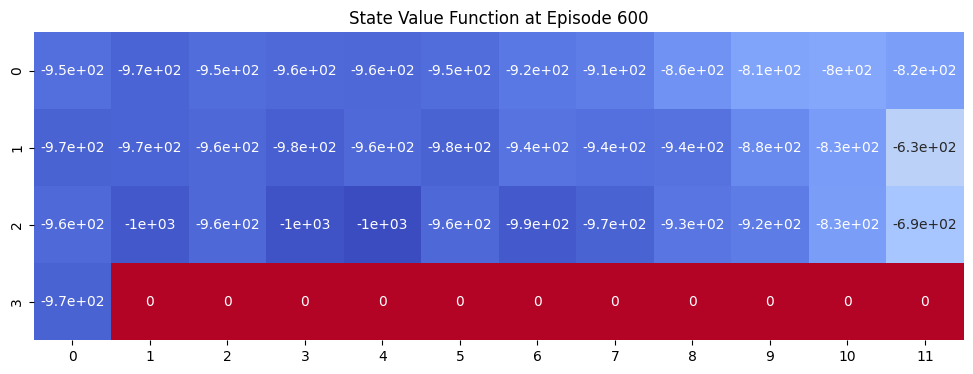

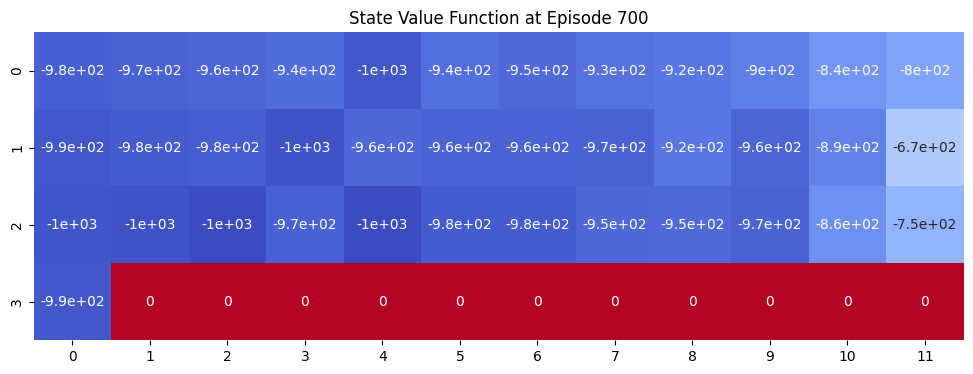

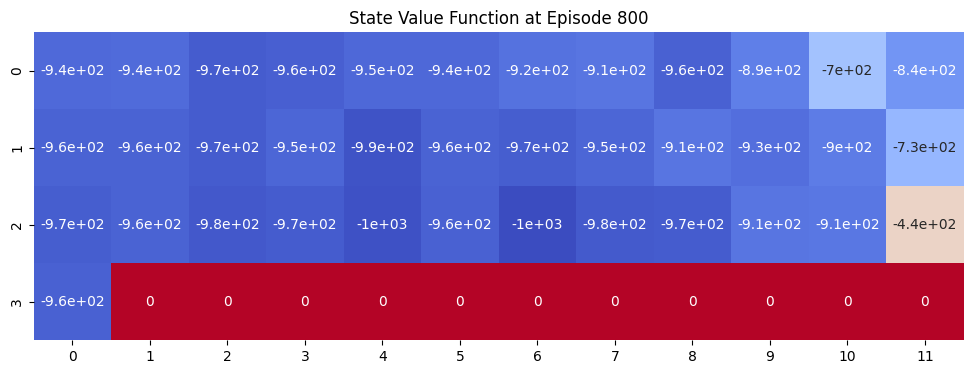

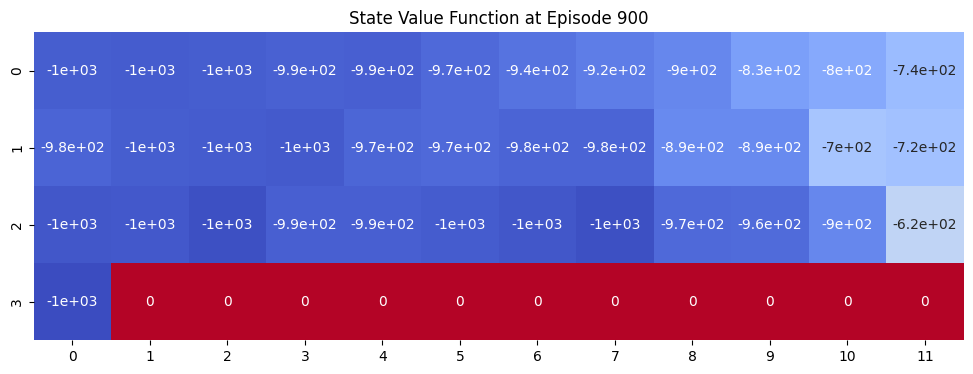

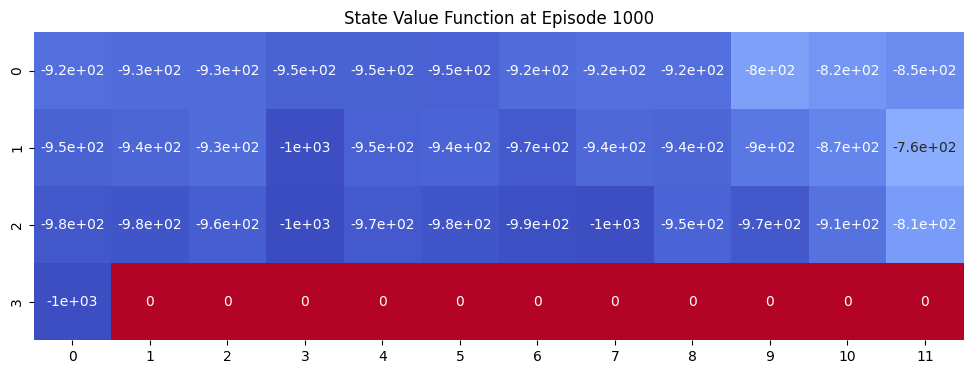

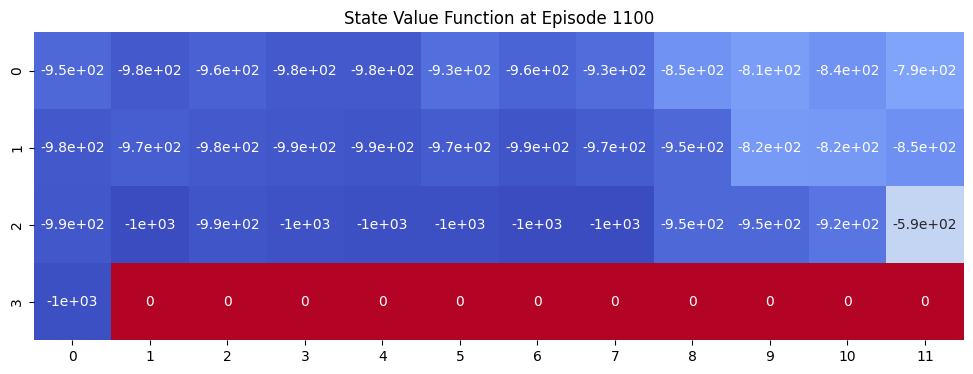

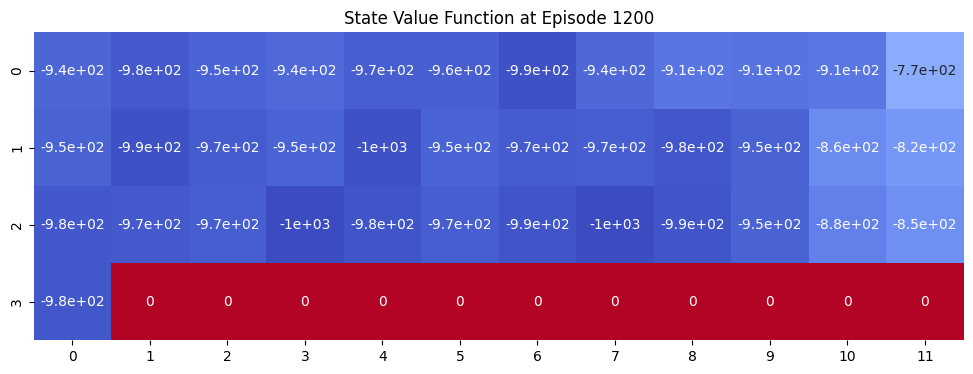

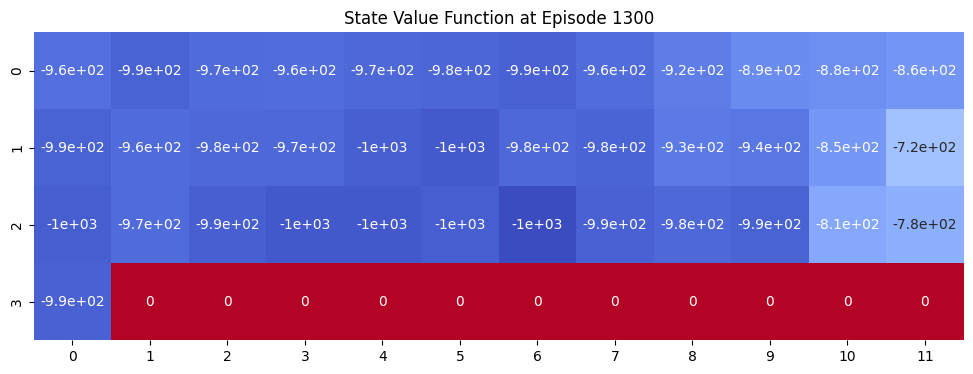

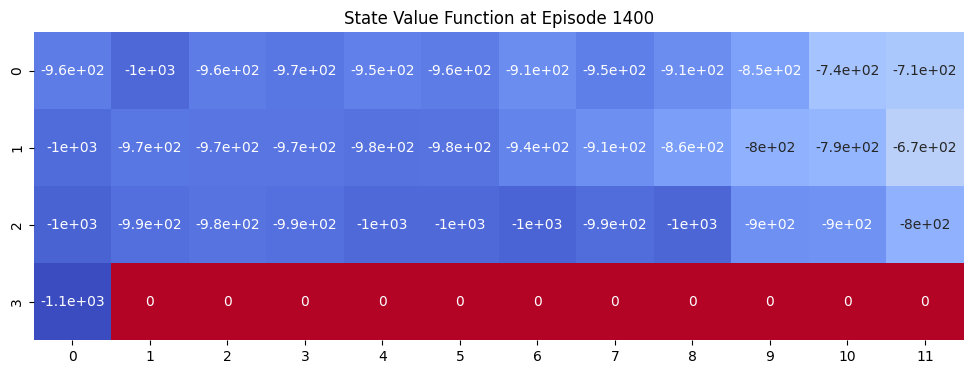

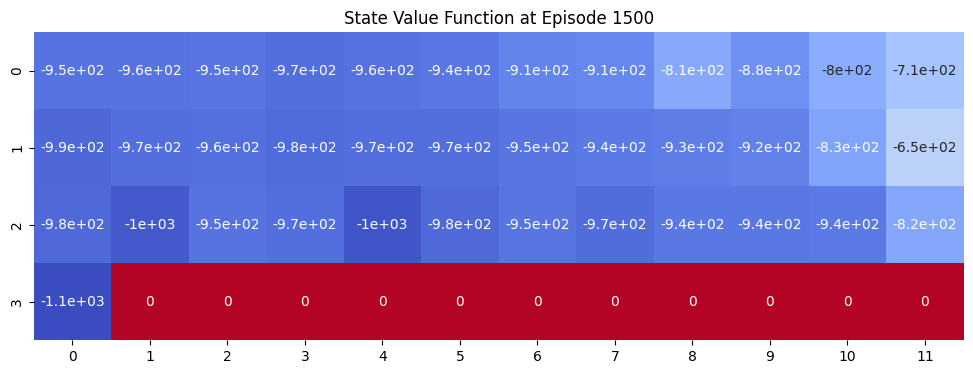

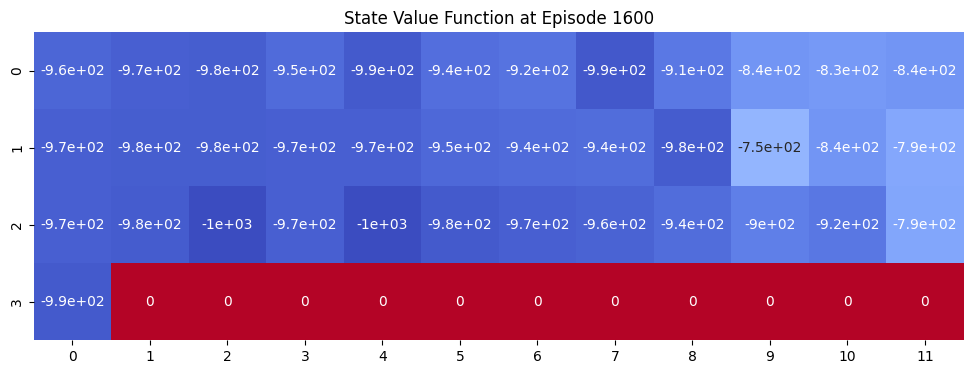

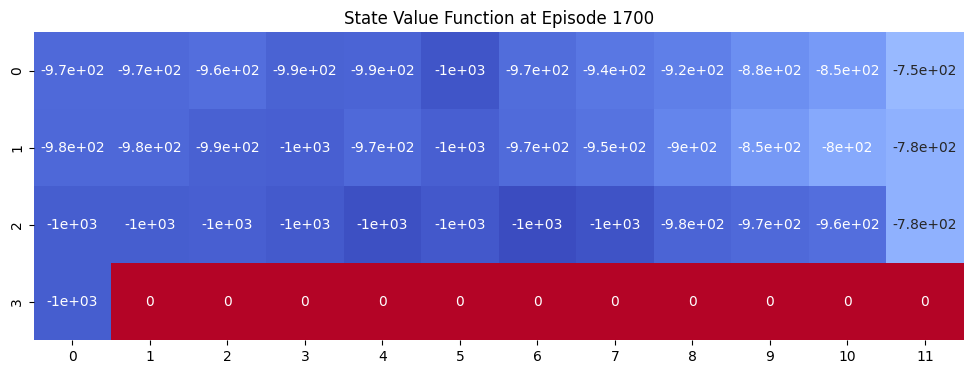

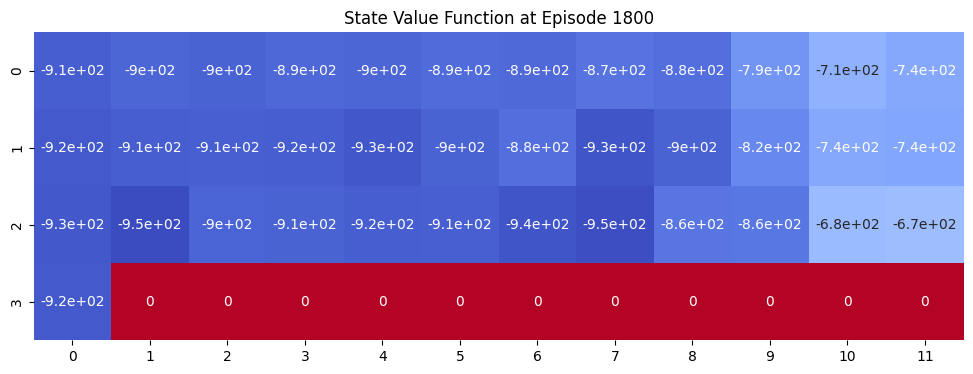

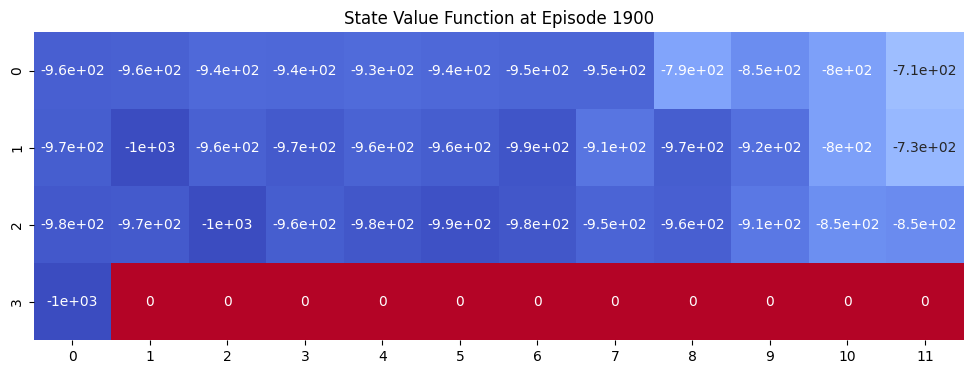

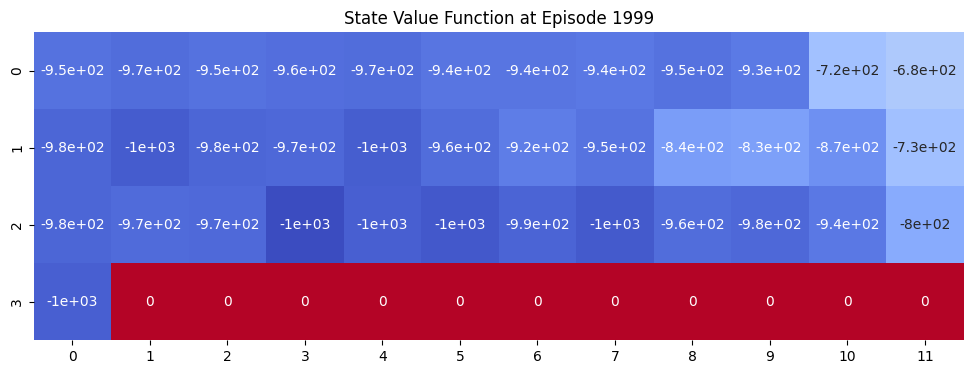

Final Learned Value Function:
[ -951.00496677  -965.13551125  -951.38364686  -960.77144965
  -966.08868864  -943.49659355  -943.26971427  -936.53946094
  -951.38506126  -929.93221658  -721.29538623  -681.17619715
  -981.1615062  -1004.86959484  -980.56161484  -974.93932892
  -999.58154563  -964.09213384  -924.92448651  -947.46517349
  -839.28759467  -831.17976867  -874.13383931  -725.39227707
  -980.56045377  -966.47082278  -972.09405581 -1043.64289126
  -996.54945258 -1013.37048189  -986.31289481 -1007.14219469
  -962.131627    -977.87624046  -935.70100537  -795.04220282
  -996.35965535     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.        ]


In [27]:
class TD1Agent:
    def __init__(self, env, alpha=0.1, gamma=0.99):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = (4, 12)  # Assuming square grid

    def policy(self, state):
        """Random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

        # recursive function call to sum over the futuristic rewards
    def exponent_sum(self, state, n):
        if n == 0:
            return self.V[state]  # Bootstrapping from the last state's value

        action = self.policy(state)
        next_state, reward, done, _, _ = self.env.step(action)

        if done:
            return reward  # No future rewards if episode ends

        return reward + self.gamma * self.exponent_sum(next_state, n - 1)


    def train(self, n, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            # print(f"Episode : {episode + 1}")
            state = self.env.reset()[0]  # Reset environment
            done = False
            iter = n
            while not done:
                action = self.policy(state)
                next_state, reward, done, _, _ = self.env.step(action)
                # n = n-1
                # TD(0) update rule
                # self.gamma * self.V[next_state] - exponent sum
                self.V[state] += self.alpha * (self.exponent_sum(state, n) - self.V[state])

                state = next_state  # Move to the next state

            # Visualize every few episodes
            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(12, 4))
        sns.heatmap(self.V.reshape(4, 12), annot=True, cmap="coolwarm", cbar=False)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)  # Pause to see updates

    def render_frozen_lake(self):
        """Renders the Cliff Walking Environment."""
        self.env.reset()
        self.env.render()

    def get_value_function(self):
        return self.V

# Example Usage
env = gym.make("CliffWalking-v0")
# env = gym.make("FrozenLake-v1", render_mode = 'human')  # A simple gridworld environment
agent = TD1Agent(env)

# Render the initial FrozenLake grid
print("Cliff Walking Environment:")
agent.render_frozen_lake()

n = int(input("Enter the number of futuristic states to sample from : "))

# Train the agent and visualize updates
agent.train(n, episodes=2000, visualize_interval=100)

# Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())


<h1>Custom Reward setting: Cliff Walking</h1>

Initial Environement
Action : 1
Reward : -100.0
Cliff Walking Environment:


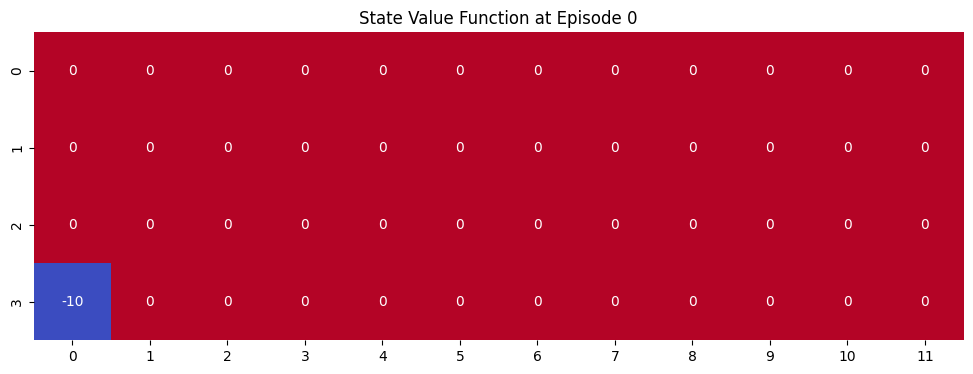

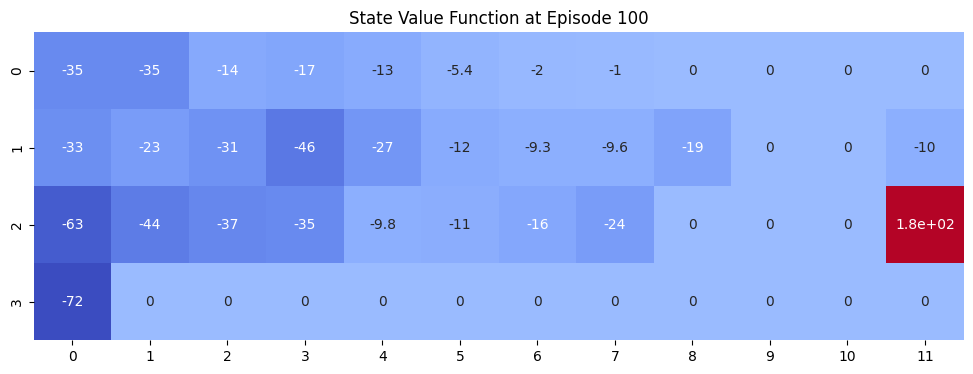

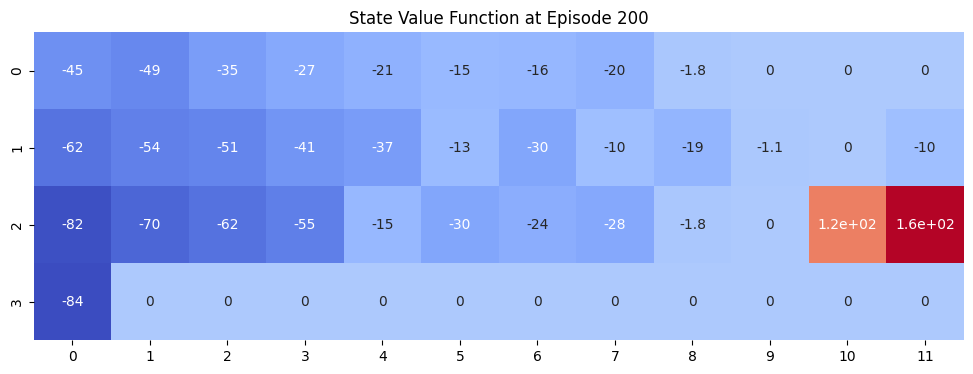

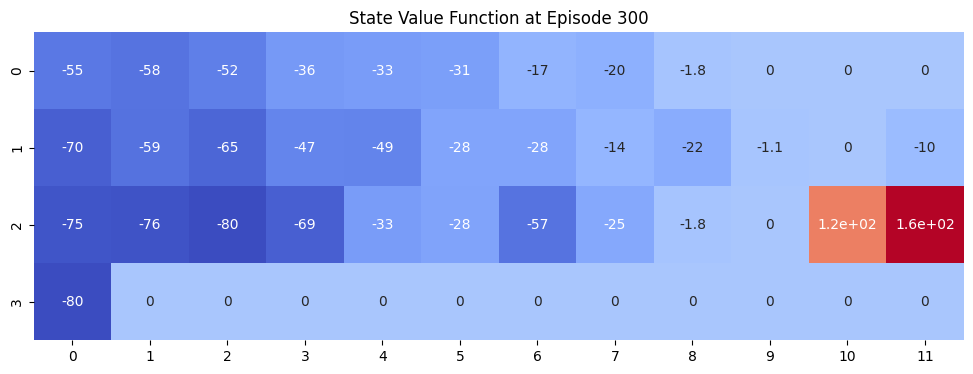

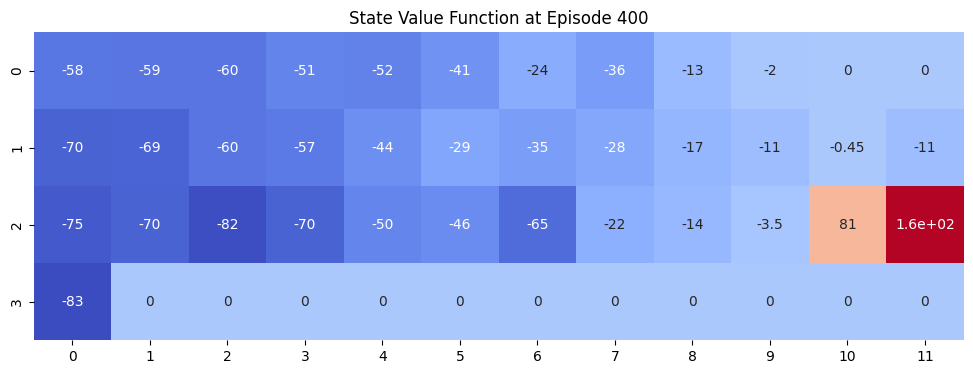

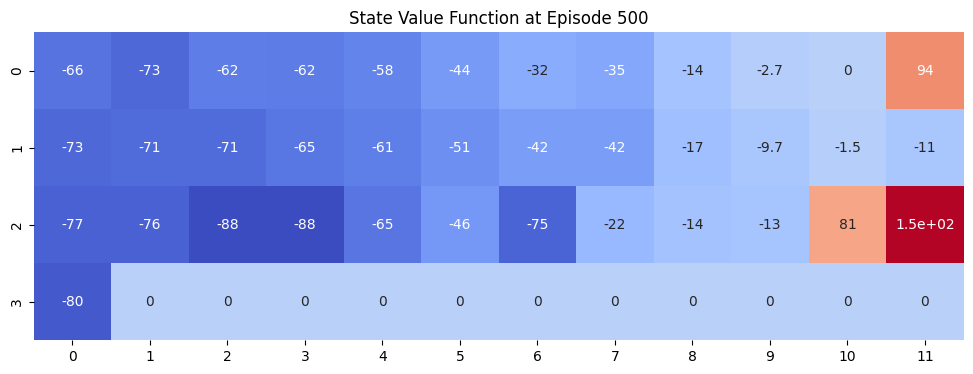

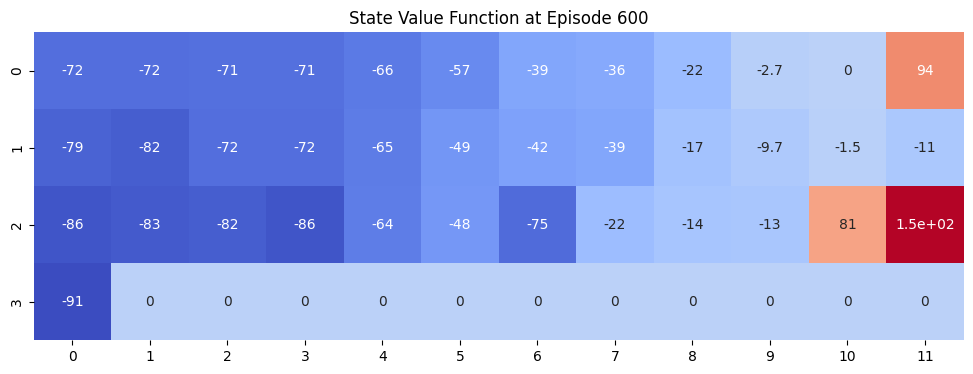

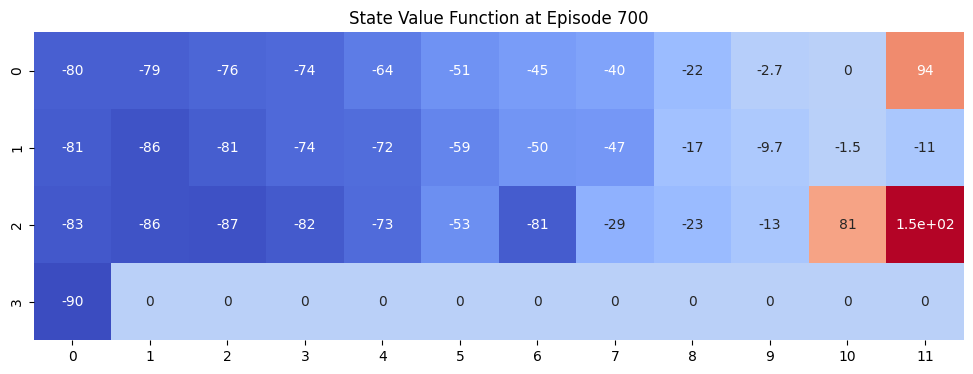

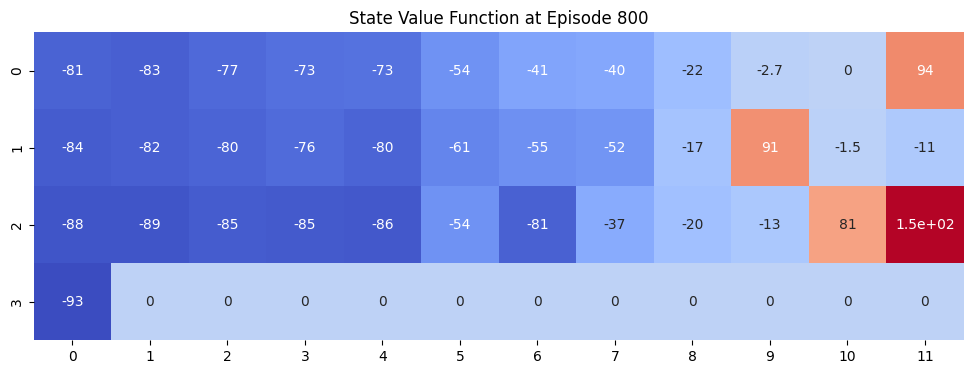

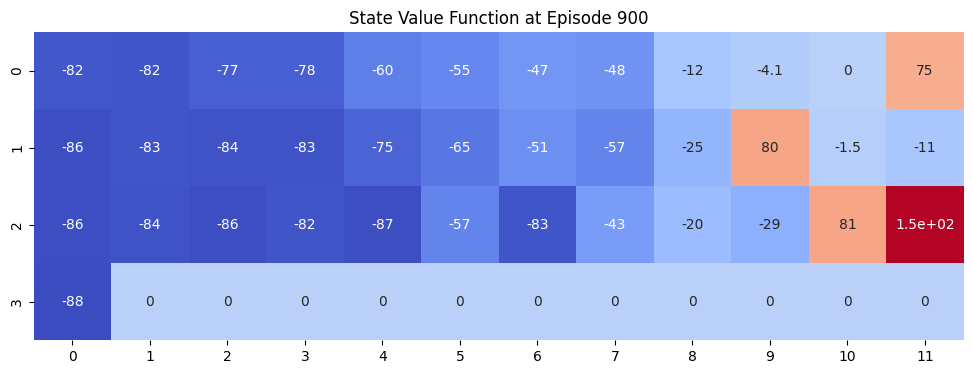

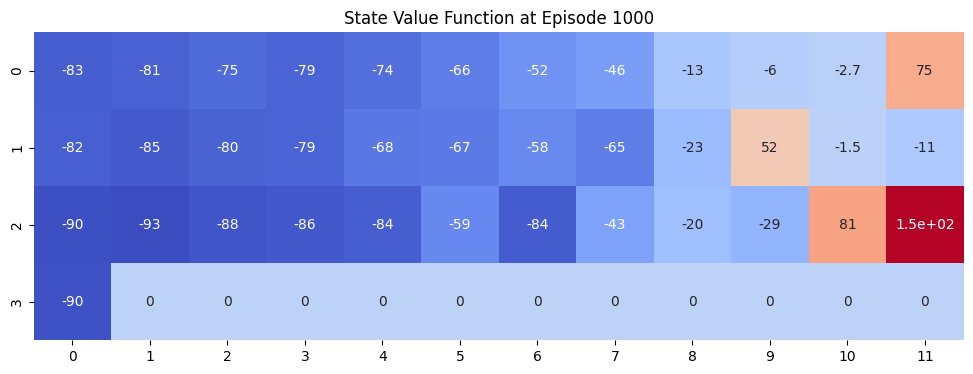

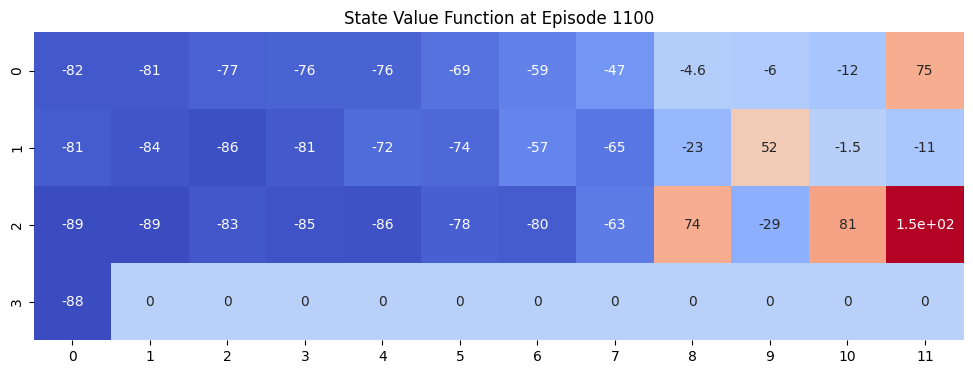

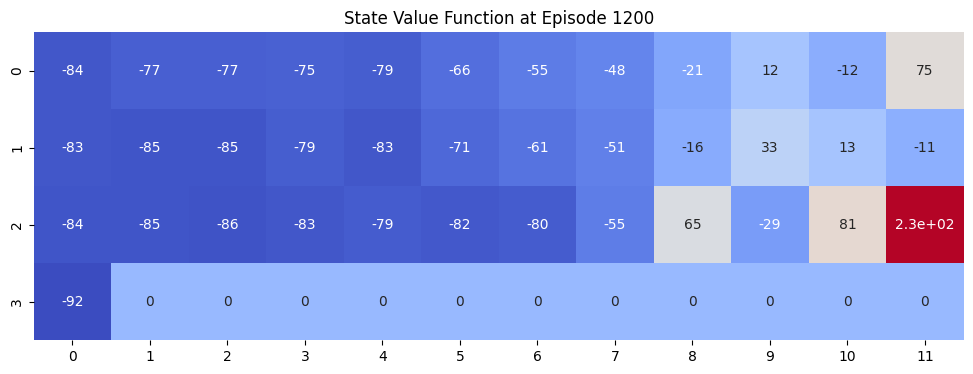

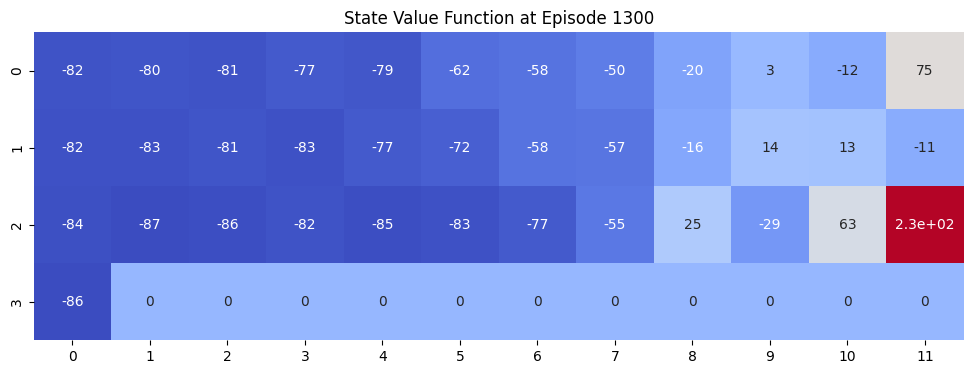

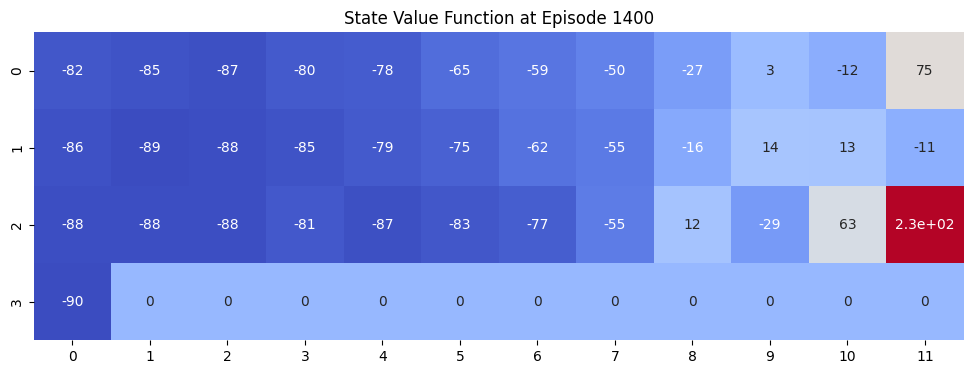

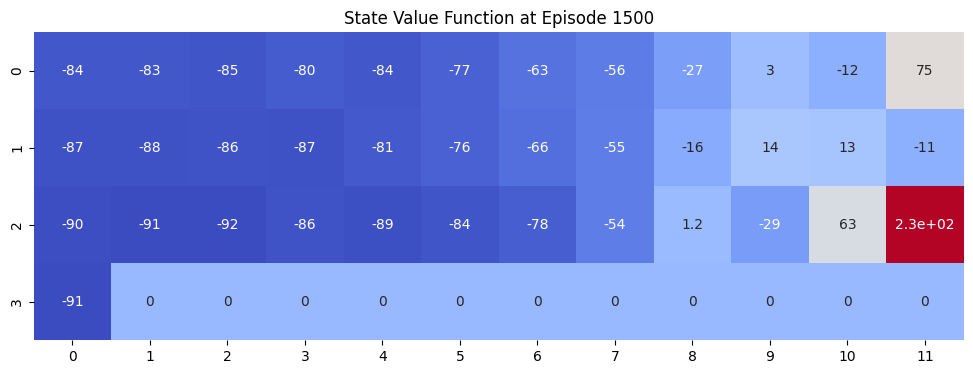

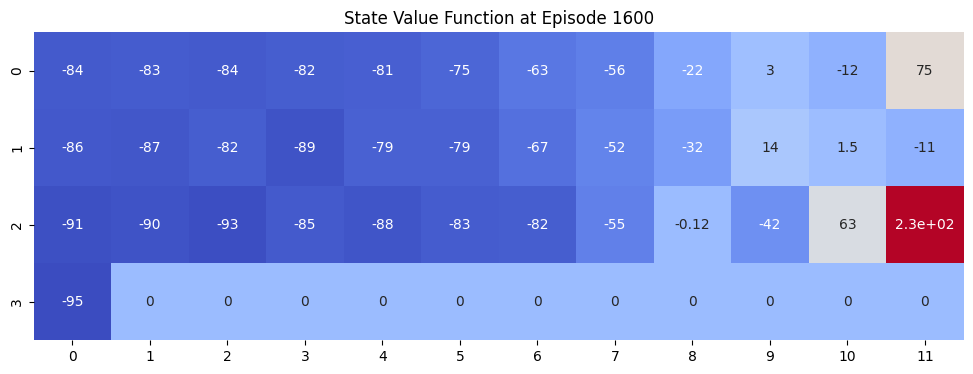

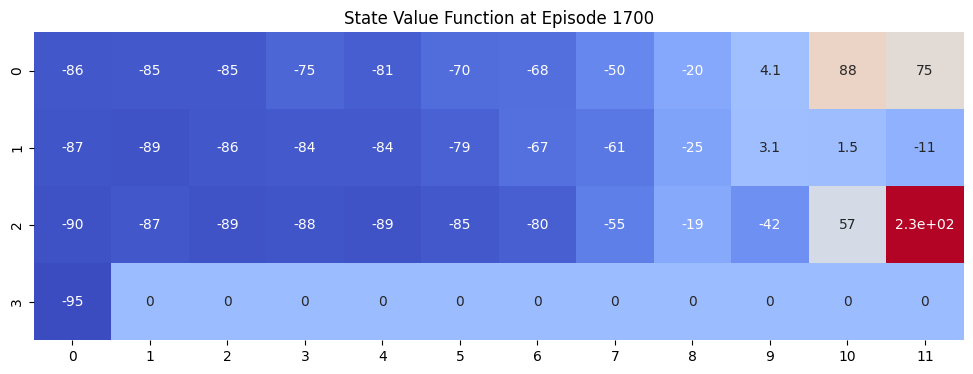

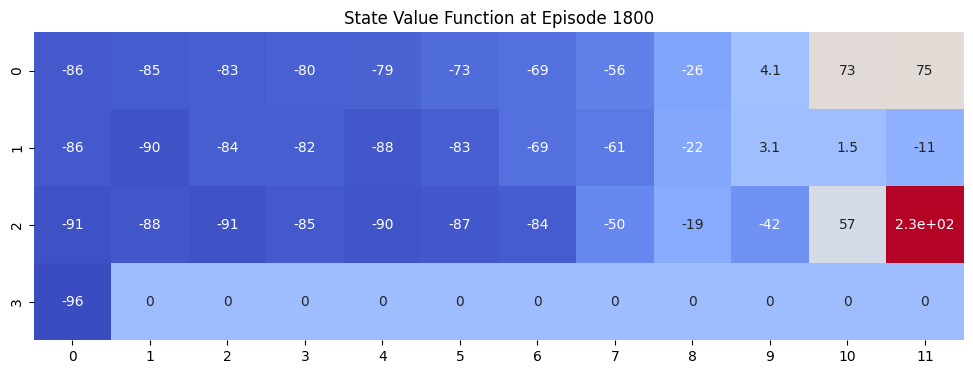

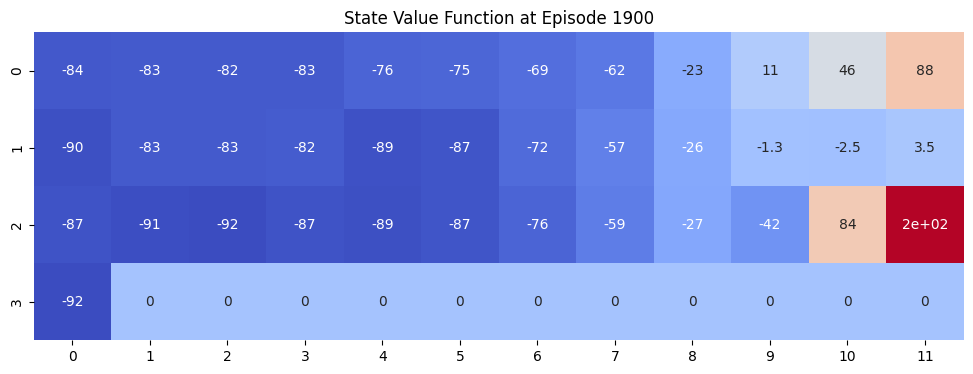

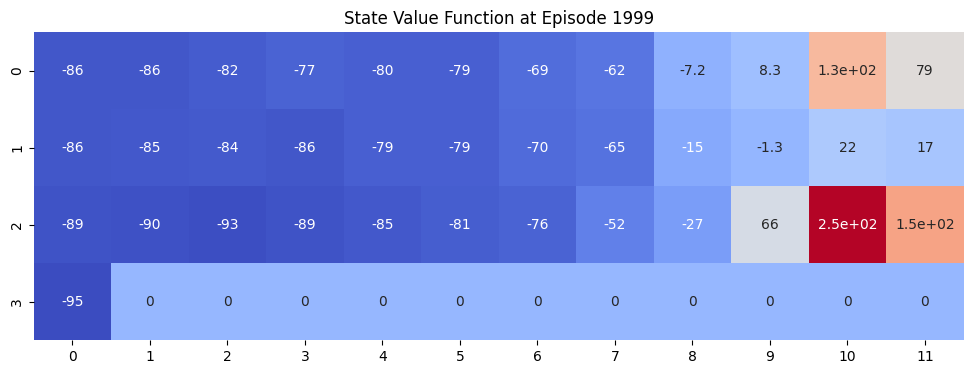

Final Learned Value Function:
[-86.02423538 -86.46158785 -81.61366816 -76.56676888 -79.89784806
 -79.26788695 -68.53541942 -61.695713    -7.22471249   8.3018847
 132.07214817  79.00966502 -85.99984715 -85.22457817 -83.71629289
 -85.6023578  -78.83359458 -79.39780319 -70.31954401 -64.63214405
 -14.79534297  -1.33579051  21.74563488  16.74534664 -88.72221687
 -89.9017674  -92.89232876 -89.3400535  -85.19282902 -81.31257056
 -76.28920582 -52.16047493 -26.83719064  65.58873722 247.2259883
 152.50197855 -94.75831686   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.        ]


In [26]:
class TD1Agent:
    def __init__(self, env, alpha=0.1, gamma=0.99):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = (4, 12)  # Assuming square grid

    def policy(self, state):
        """Random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

        # recursive function call to sum over the futuristic rewards
    def exponent_sum(self, state, n):
        if n == 0:
            return self.V[state]  # Bootstrapping from the last state's value

        action = self.policy(state)
        next_state, reward, done, _ = self.env.step(action)

        if done:
            return reward  # No future rewards if episode ends

        return reward + self.gamma * self.exponent_sum(next_state, n - 1)


    def train(self, n, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            # print(f"Episode : {episode + 1}")
            state = self.env.reset()  # Reset environment
            done = False
            iter = n
            while not done:
                action = self.policy(state)
                next_state, reward, done, _ = self.env.step(action)
                # n = n-1
                # TD(0) update rule
                # self.gamma * self.V[next_state] - exponent sum
                self.V[state] += self.alpha * (self.exponent_sum(state, n) - self.V[state])

                state = next_state  # Move to the next state

            # Visualize every few episodes
            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(12, 4))
        sns.heatmap(self.V.reshape(4, 12), annot=True, cmap="coolwarm", cbar=False)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)  # Pause to see updates

    def render_frozen_lake(self):
        """Renders the Cliff Walking Environment."""
        self.env.reset()
        self.env.render()

    def get_value_function(self):
        return self.V

# Example Usage
class cliffWalking(Env):
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(grid_size[0] * grid_size[1])

        self.mountain = np.zeros(grid_size)
        self.mountain[grid_size[0] - 1, 1:grid_size[1]-1] = 1
        self.mountain[grid_size[0] - 1, grid_size[1] - 1] = 2

        self.rewards = np.zeros_like(self.mountain, dtype = float)
        self.rewards[grid_size[0] - 1, 1:grid_size[1]-2] = -100
        self.rewards[grid_size[0] - 1, grid_size[1] - 1] = 1000

        self.state = np.array([grid_size[0]-1, 0])

    def step(self, action):
        x, y = self.state

        if action == 0:
            y = max(0, y-1)#Left
        elif action == 1:
            y = min(self.grid_size[1]-1, y+1)#Right
        elif action == 2:
            x = max(0, x-1)#Up
        elif action == 3:
            x = min(self.grid_size[0]-1, x+1)#Down
    
        self.state = np.array([x, y])

        reward = self.rewards[x, y]

        done = self.mountain[x, y] == 2 or self.mountain[x, y] == 1

        return self._get_state_index(), reward, done, {}
    
    def reset(self):
        self.state = np.array([self.grid_size[0]-1, 0])
        return self._get_state_index()


    def render(self):
        pass
        # plt.plot(self.state[1], self.state[0], 'ro')
        # plt.imshow(self.mountain)
        # plt.show()

    def _get_state_index(self):
        return self.state[0] * self.grid_size[1] + self.state[1]
    

rows = int(input("Enter the number of rows : "))
columns = int(input("Enter the number of cols : "))
env = cliffWalking((rows, columns))

state = env.reset()
done = False

print("Initial Environement")
env.render()

while not done:
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    print(f"Action : {action}")
    env.render()
    print(f"Reward : {reward}")
# env = gym.make("FrozenLake-v1", render_mode = 'human')  # A simple gridworld environment
agent = TD1Agent(env)

# Render the initial FrozenLake grid
print("Cliff Walking Environment:")
agent.render_frozen_lake()

n = int(input("Enter the number of futuristic states to sample from : "))

# Train the agent and visualize updates
agent.train(n, episodes=2000, visualize_interval=100)

# Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())


<h1>Custom Reward Setting: Frozen Lake</h1>

Initial Environment:
Action : 0
Reward : 0.0
Action : 2
Reward : 0.0
Action : 1
Reward : -1.0
Cliff Walking Environment:


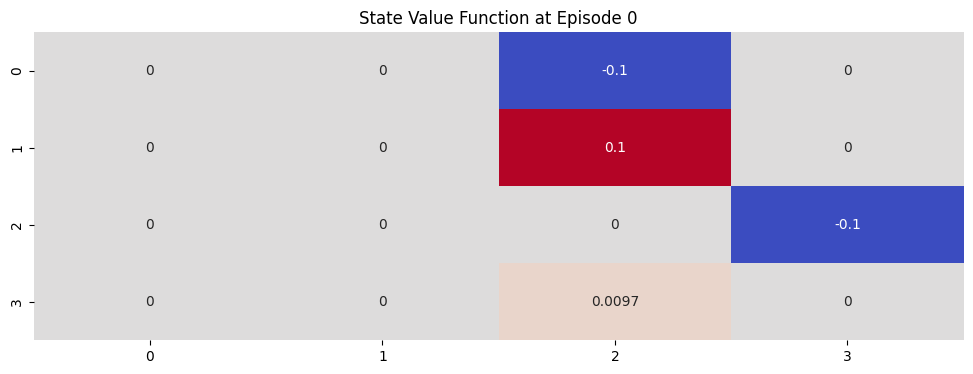

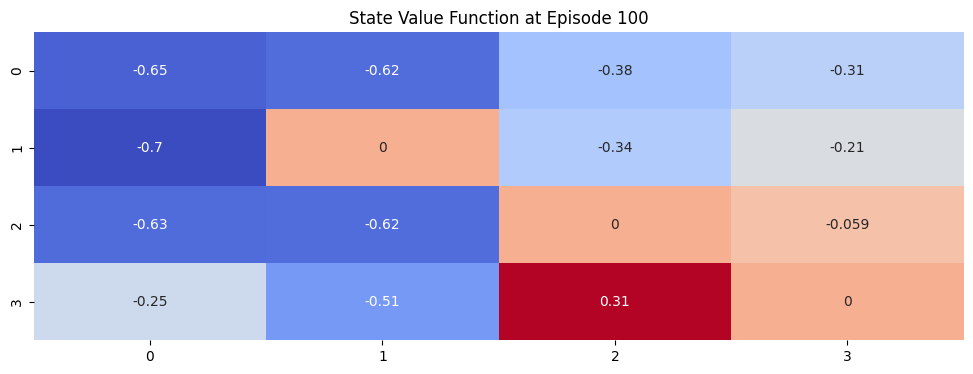

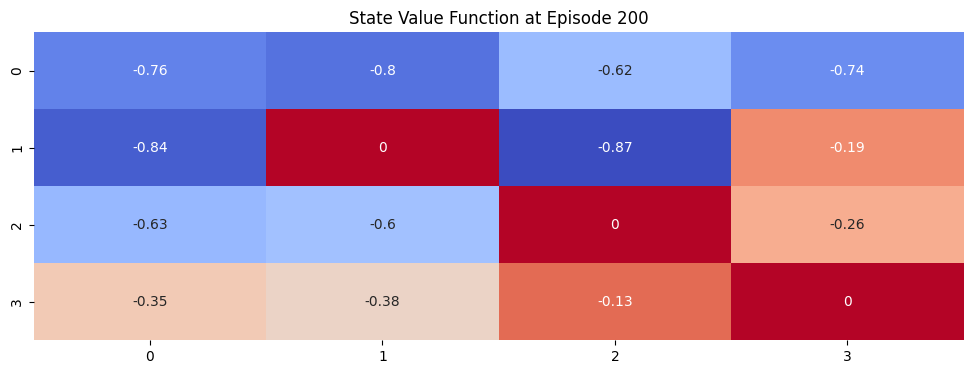

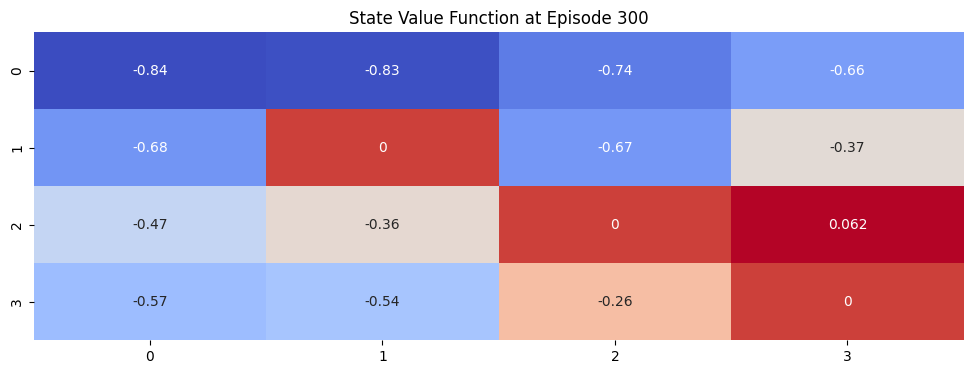

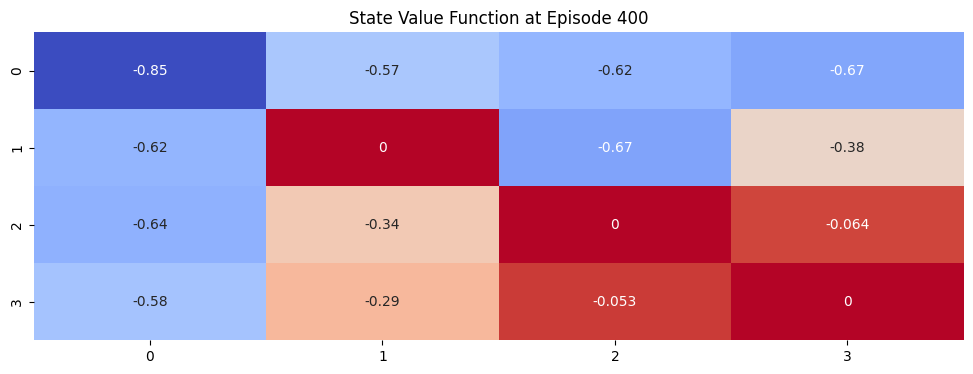

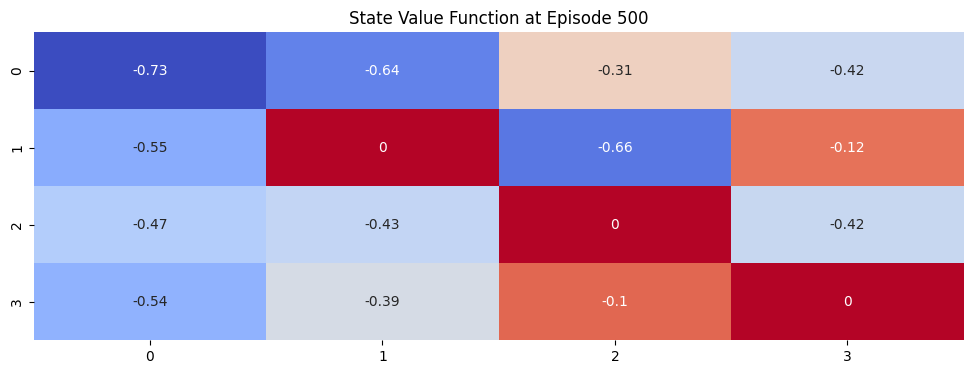

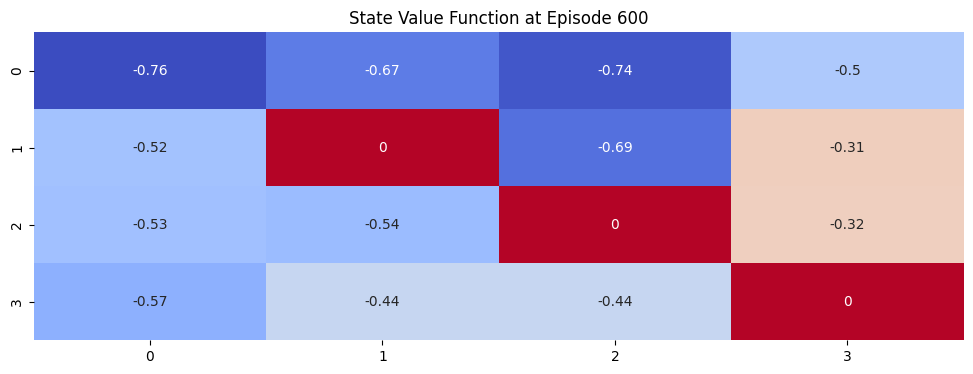

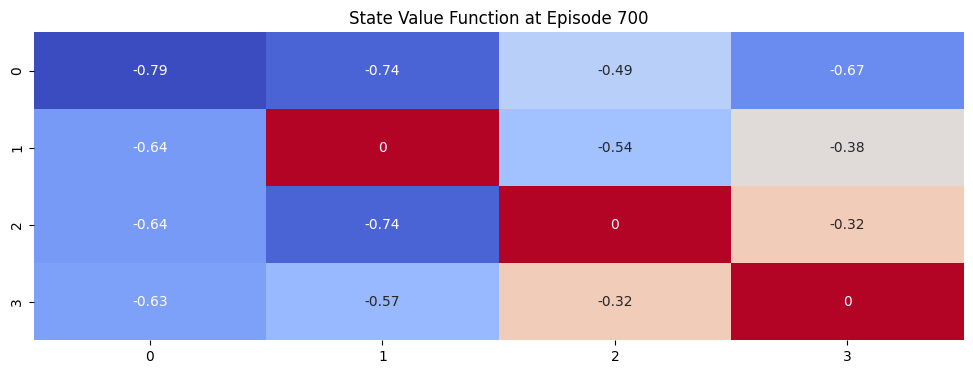

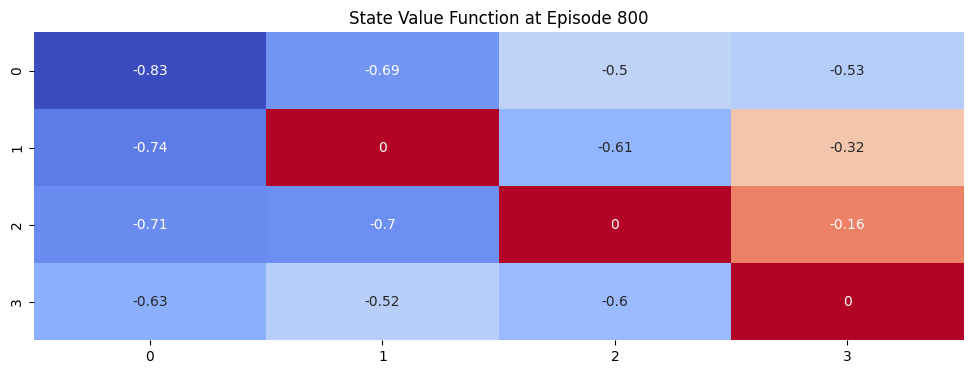

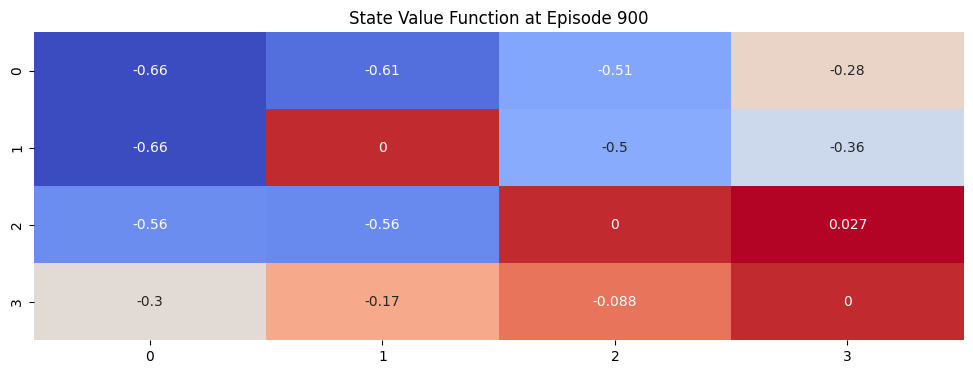

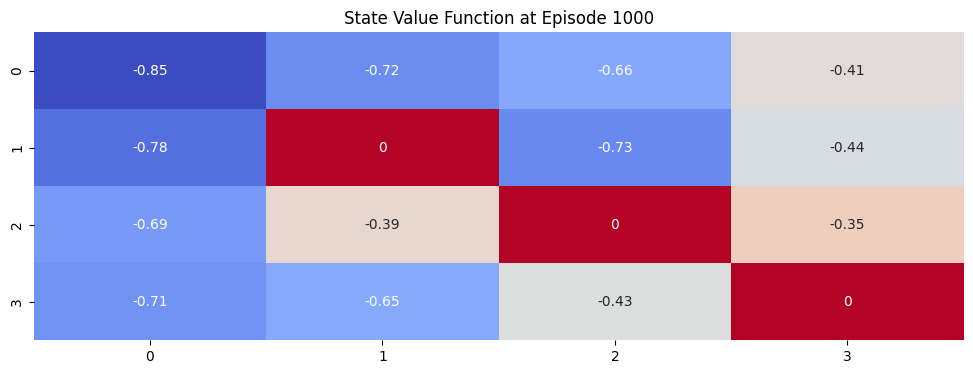

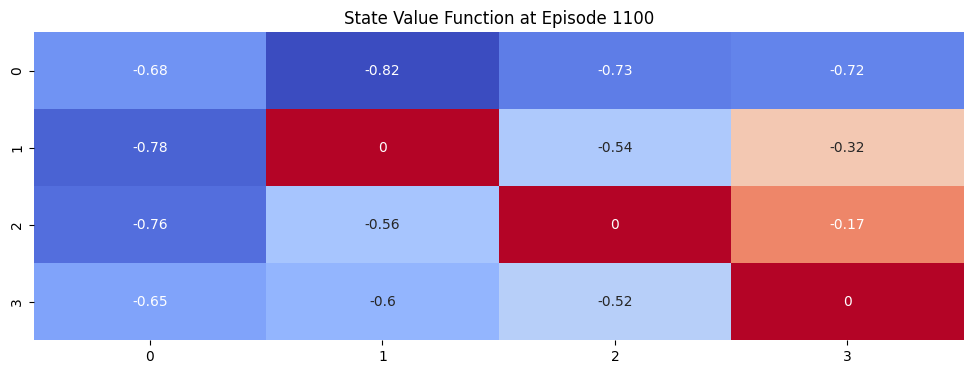

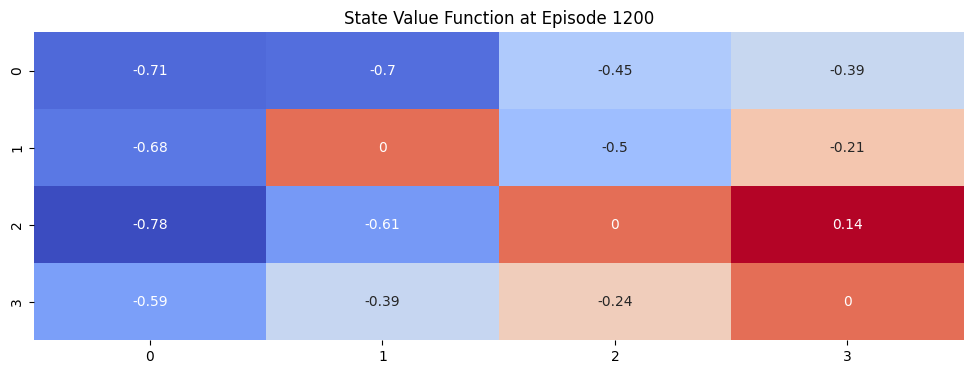

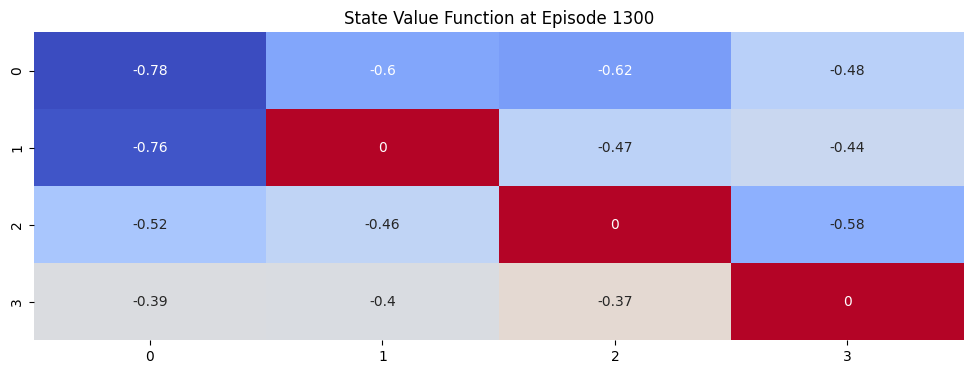

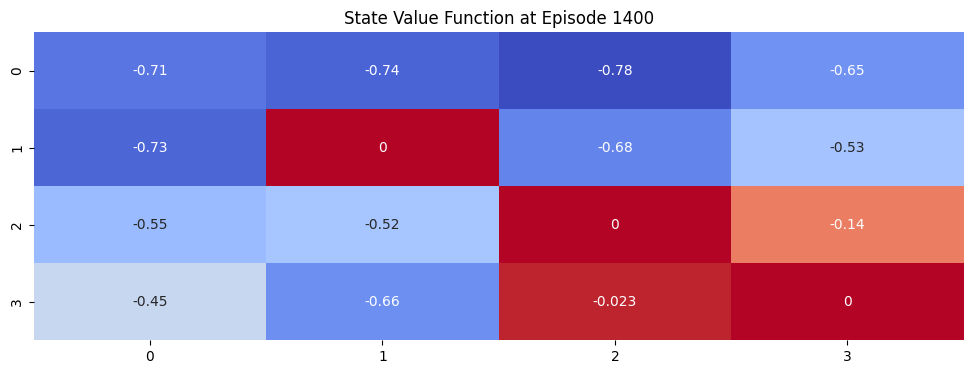

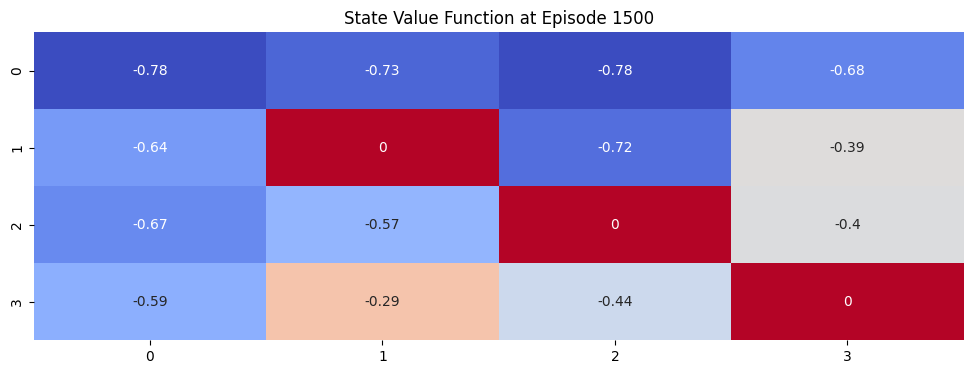

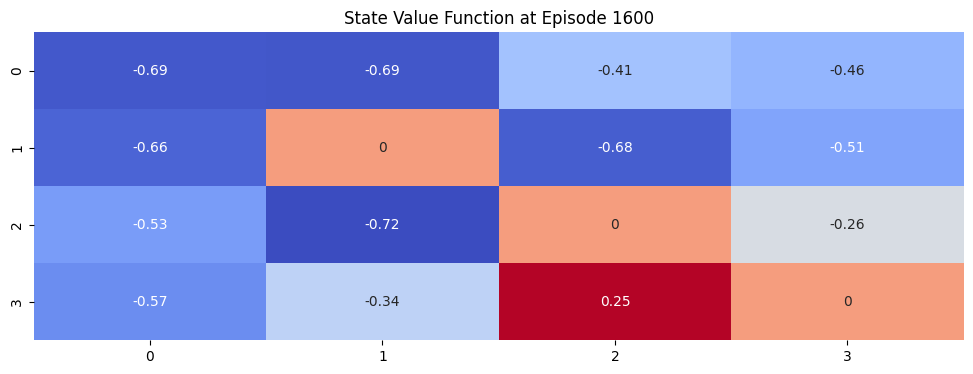

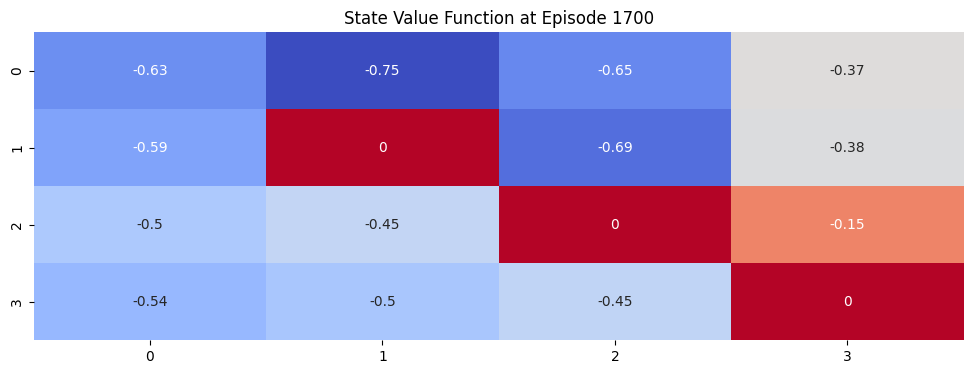

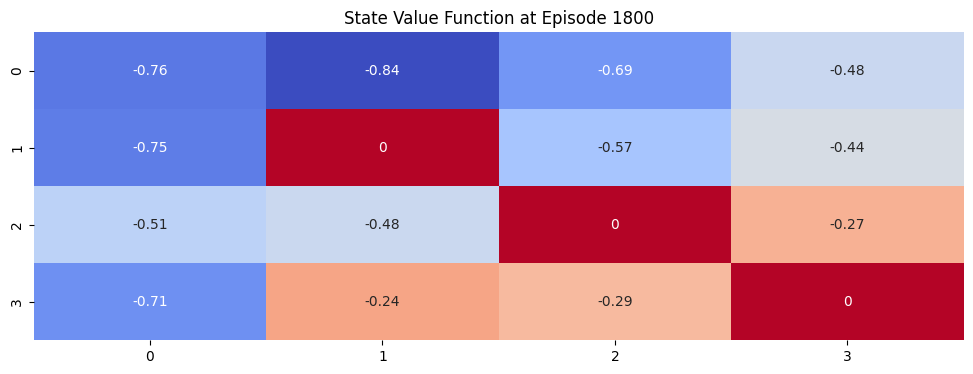

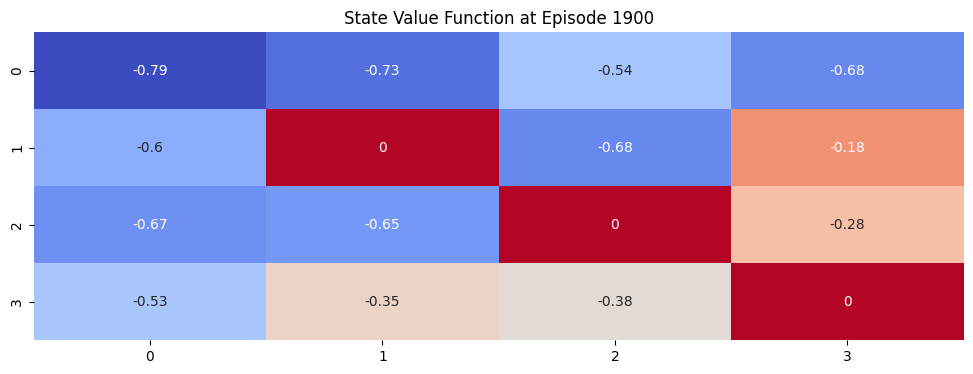

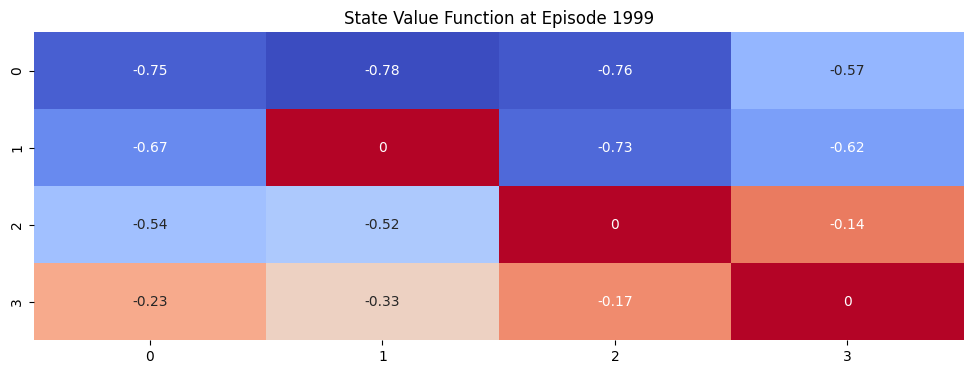

Final Learned Value Function:
[-0.74830824 -0.78249238 -0.75950729 -0.5686716  -0.66791309  0.
 -0.73015186 -0.62363071 -0.54369325 -0.51599568  0.         -0.14266568
 -0.23127157 -0.33437952 -0.17043521  0.        ]


In [29]:
class TD1Agent:
    def __init__(self, env, alpha=0.1, gamma=0.99):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = (4, 4)  # Assuming square grid

    def policy(self, state):
        """Random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

        # recursive function call to sum over the futuristic rewards
    def exponent_sum(self, state, n):
        if n == 0:
            return self.V[state]  # Bootstrapping from the last state's value

        action = self.policy(state)
        next_state, reward, done, _ = self.env.step(action)

        if done:
            return reward  # No future rewards if episode ends

        return reward + self.gamma * self.exponent_sum(next_state, n - 1)


    def train(self, n, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            # print(f"Episode : {episode + 1}")
            state = self.env.reset()  # Reset environment
            done = False
            iter = n
            while not done:
                action = self.policy(state)
                next_state, reward, done, _ = self.env.step(action)
                # n = n-1
                # TD(0) update rule
                # self.gamma * self.V[next_state] - exponent sum
                self.V[state] += self.alpha * (self.exponent_sum(state, n) - self.V[state])

                state = next_state  # Move to the next state

            # Visualize every few episodes
            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(12, 4))
        sns.heatmap(self.V.reshape(4, 4), annot=True, cmap="coolwarm", cbar=False)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)  # Pause to see updates

    def render_frozen_lake(self):
        """Renders the Cliff Walking Environment."""
        self.env.reset()
        self.env.render()

    def get_value_function(self):
        return self.V
class CustomFrozenLakeEnv(Env):
    def __init__(self, grid_size=4):
        super(CustomFrozenLakeEnv, self).__init__()

        #define grid size
        self.grid_size = grid_size

        # action spaces : 0 - left ; 1 - down ; 2 - right ; 3 - up
        self.action_space = spaces.Discrete(4)

        # observation space where each state corresponds to a grid cell
        self.observation_space = spaces.Discrete(grid_size * grid_size)

        # define lake layout : 0 = frozen, 1 = hole, 2 = goal
        self.lake = np.zeros((grid_size, grid_size), dtype=int)
        self.lake[-1, -1] = 2  # Goal
        self.lake[1, 1] = 1  # Hole
        self.lake[2, 2] = 1  # Hole

        #rewards
        self.rewards = np.zeros_like(self.lake, dtype=float)
        self.rewards[-1, -1] = 1.0  # reward
        self.rewards[self.lake == 1] = -1.0  # penalty

        
        #starting state
        self.state = (0, 0)


    def step(self, action):
        x, y = self.state

        # move agent
        if action == 0:  # Left
            y = max(0, y - 1)
        elif action == 1:  # Down
            x = min(self.grid_size - 1, x + 1)
        elif action == 2:  # Right
            y = min(self.grid_size - 1, y + 1)
        elif action == 3:  # Up
            x = max(0, x - 1)

        # state updation
        self.state = (x, y)

        reward = self.rewards[x, y]

        # termination check
        done = self.lake[x, y] == 2 or self.lake[x, y] == 1

        # return all info
        return self._get_state_index(), reward, done, {}

    def reset(self):
        self.state = (0, 0)
        return self._get_state_index()

    def render(self):
        grid = np.array(self.lake, dtype=str)
        grid[self.lake == 0] = "."
        grid[self.lake == 1] = "H"
        grid[self.lake == 2] = "G"
        x, y = self.state
        grid[x, y] = "A"  # agent
        # print("\n".join(" ".join(row) for row in grid))
        

    def _get_state_index(self):
        return self.state[0] * self.grid_size + self.state[1]

env = CustomFrozenLakeEnv(grid_size=4)
state = env.reset()
done = False

print("Initial Environment:")
env.render()

while not done:
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    print(f"Action : {action}")
    env.render()
    print(f"Reward : {reward}")
# env = gym.make("FrozenLake-v1", render_mode = 'human')  # A simple gridworld environment
agent = TD1Agent(env)

# Render the initial FrozenLake grid
print("Cliff Walking Environment:")
agent.render_frozen_lake()

n = int(input("Enter the number of futuristic states to sample from : "))

# Train the agent and visualize updates
agent.train(n, episodes=2000, visualize_interval=100)

# Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())
